# Análisis de Coeficiente Experiencial

In [0]:
!pip install azure-storage==0.32.0

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from azure.storage.blob import BlockBlobService
from io import StringIO

In [0]:
azure_storage_account_name = "pintegrador"
azure_storage_account_key = "pK6fMmlQr7NMrM+TAMlgu9iUIJWNMEGBdOyiw0XiX1q1jbQEbLkX0+4/0DEhV794c32Riu+xpPv6ZcGOcC4i9g=="
azure_storage_container_name = "datos"
file_name = "data.csv"

#First, we need to connect to our blob via the BlobService
blob_service = BlockBlobService(azure_storage_account_name, azure_storage_account_key)
a = blob_service.get_blob_to_text(azure_storage_container_name,file_name)

In [0]:
df = pd.read_csv(StringIO(a.content), delimiter=",", encoding="utf-8")
df.head()

Unnamed: 0  IdUsuario  OH  DH    DP    AT   NV    seconds
0           0          2   1   1   219   372    5      331.0
1           1          8  49   3  1048   922   12  2287519.7
2           2          9   3   3  1316   555  237   110712.1
3           3         10  32   5   977  1023   52   790531.2
4           4         12   7   7  1255  1061  144   515739.8

In [0]:
df = df.drop(['Unnamed: 0'],axis = 1)
df.head()

IdUsuario  OH  DH    DP    AT   NV    seconds
0          2   1   1   219   372    5      331.0
1          8  49   3  1048   922   12  2287519.7
2          9   3   3  1316   555  237   110712.1
3         10  32   5   977  1023   52   790531.2
4         12   7   7  1255  1061  144   515739.8

In [0]:
len(df)

61554

In [0]:
df = df[df['seconds']>0]
len(df)

57677

In [0]:
df = df[np.isfinite(df['seconds'])]
len(df)

57677

In [0]:
df['seconds'] = df['seconds']/3600
df_2 = df
df['seconds'] = df['seconds']/2
df.head(10)

IdUsuario  OH  DH    DP    AT   NV      seconds
0          2   1   1   219   372    5     0.045972
1          8  49   3  1048   922   12   317.711069
2          9   3   3  1316   555  237    15.376681
3         10  32   5   977  1023   52   109.796000
4         12   7   7  1255  1061  144    71.630528
5         13  12  12  1436   820  132    58.778694
6         21   1   1  1570   939   22   423.918875
7         22  28  27   340   975    6  1180.712917
8         27   8  12   559  1045    2   383.733889
9         33   5  36  1175  1037   97   107.475083

In [0]:
#Funcion para calcular el CE
import math

def CoefExp(R,T,K = 1): #Constante K se utiliza para cambiar el periodo de tiempo
    
    X =  (2 / (1 + math.exp(- R / (K*T) ))) - 1
    
    return X

In [0]:
#Calculo del CE
CE = np.zeros(len(df))

for i in range (0, len(df)):
    R = df.iloc[i,5]
    T = df.iloc[i,6]
    CE[i] = CoefExp(R,T)
CE.mean()

0.46540178428927403

In [0]:
np.median(CE)

0.3486498279148118

Text(0, 0.5, '# Usuarios')

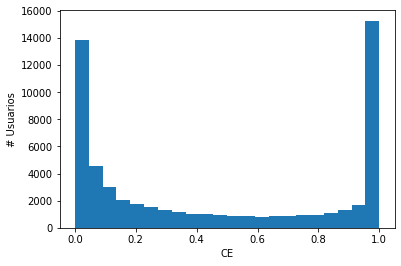

In [0]:
plt.hist(CE, bins='auto')  # arguments are passed to np.histogram
plt.xlabel('CE')
plt.ylabel('# Usuarios')

In [0]:
#Calculo del CE
size = (len(df_2), 24)
CE_2 = np.zeros(size)

for j in range (1, 24):
    for i in range (0, len(df_2)):
        R = df.iloc[i,5]
        T = df.iloc[i,6]
        CE_2[i, j] = CoefExp(R,T,j)

Text(0, 0.5, 'CE')

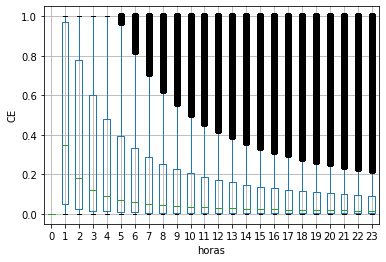

In [0]:
CE_2 = pd.DataFrame(CE_2)
boxplot = CE_2.boxplot()
plt.xlabel('horas')
plt.ylabel('CE')

In [0]:
CE_2.describe()

0             1   ...            22            23
count  57677.0  57677.000000  ...  57677.000000  57677.000000
mean       0.0      0.465402  ...      0.108148      0.105000
std        0.0      0.409550  ...      0.211911      0.208287
min        0.0      0.000077  ...      0.000003      0.000003
25%        0.0      0.049842  ...      0.002267      0.002169
50%        0.0      0.348650  ...      0.016540      0.015821
75%        0.0      0.969557  ...      0.094483      0.090398
max        0.0      1.000000  ...      1.000000      1.000000

[8 rows x 24 columns]

In [0]:
Pt = np.zeros(100)
k = np.zeros(100)

percentil_0 = 0
percentil_1 = 0
zero_aux = 0
one_aux = 0

for i in range (1, 100):
    Pt[i] = np.percentile(CE,i)
    k[i] = i/100
    if (Pt[i] > 0) and (zero_aux == 0):
        percentil_0 = k[i]
        zero_aux = 1
    if (Pt[i] > 0.999) and (one_aux == 0):
        percentil_1 = k[i]
        one_aux = 1

print(percentil_0)
print(percentil_1)
    
plt.scatter(k,Pt)
plt.xlabel('Percentil')
plt.ylabel('CE')

0.01
0.83


Text(0, 0.5, 'CE')

In [0]:
m = np.diff(Pt)/np.diff(k)
idx = np.nonzero(np.diff(m))[0]
print (idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]


In [0]:
df['CE'] = CE
df.head(100)

IdUsuario  OH  DH    DP    AT   NV     seconds        CE
0            2   1   1   219   372    5    0.045972  1.000000
1            8  49   3  1048   922   12  317.711069  0.018883
2            9   3   3  1316   555  237   15.376681  1.000000
3           10  32   5   977  1023   52  109.796000  0.232474
4           12   7   7  1255  1061  144   71.630528  0.763752
..         ...  ..  ..   ...   ...  ...         ...       ...
101        263  13  62  1099  1040   93  112.981167  0.389807
103        269  47  47   628  1041    5  891.679611  0.002804
104        270  49  49   810   287    3  659.278333  0.002275
106        272  33  32  1366   777   12  630.373819  0.009518
107        275  34  41  2165  1060   80  131.565944  0.294996

[100 rows x 8 columns]

In [0]:
output_definitiva = df.to_csv(encoding="utf-8")
blob_service.create_blob_from_text(azure_storage_container_name, "DEFINITIVA.csv",
                                   output_definitiva) 

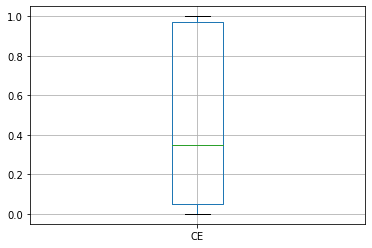

In [0]:
boxplot = df.boxplot(column=['CE'])

In [0]:
df.dtypes

IdUsuario      int64
OH             int64
DH             int64
DP             int64
AT             int64
NV             int64
seconds      float64
CE           float64
dtype: object

# Clasificacion de los usuarios

Procedemos a clasificar los usuarios como NO habilutales si su CE es menor a 1 (en realidad a 0.999) y habituales si su CE es mayor a 0.999

In [0]:
df = df_2
df['CE'] = CE
df.head(10)

IdUsuario  OH  DH    DP    AT   NV      seconds        CE
0          2   1   1   219   372    5     0.045972  1.000000
1          8  49   3  1048   922   12   317.711069  0.018883
2          9   3   3  1316   555  237    15.376681  1.000000
3         10  32   5   977  1023   52   109.796000  0.232474
4         12   7   7  1255  1061  144    71.630528  0.763752
5         13  12  12  1436   820  132    58.778694  0.808560
6         21   1   1  1570   939   22   423.918875  0.025943
7         22  28  27   340   975    6  1180.712917  0.002541
8         27   8  12   559  1045    2   383.733889  0.002606
9         33   5  36  1175  1037   97   107.475083  0.422940

In [0]:
X_2 = np.array(df.sort_values(by=['CE']))

y = np.zeros(len(X_2))

for i in range(0, len(X_2)):
    if X_2[i,7] < 0.999:
        y[i] = 0
    if X_2[i,7] > 0.999:
        y[i] = 1

sum(y)

10013.0

In [0]:
df = df.sort_values(by=['CE'])
df['habitual'] = y
no_habitual = df.loc[df['habitual'] == 0]
habitual = df.loc[df['habitual'] == 1]

In [0]:
df.head()

IdUsuario  OH  DH     DP    AT  NV       seconds        CE  habitual
14674      30604  19   6  51036   953   2  13017.802917  0.000077       0.0
11849      26098  46  46    866  1059   2  10380.321250  0.000096       0.0
15084      31257   8  23    404  1060   2  10147.155278  0.000099       0.0
11389      25310  36  13   1792  1047   2   9987.440972  0.000100       0.0
14958      31048  56  56    440  1061   2   9937.362778  0.000101       0.0

In [0]:
output_habitual = df.to_csv(encoding="utf-8")
blob_service.create_blob_from_text(azure_storage_container_name, "habitual.csv",
                                   output_definitiva) 

In [0]:
no_habitual.describe()

IdUsuario            OH  ...            CE  habitual
count   47664.000000  47664.000000  ...  47664.000000   47664.0
mean    74757.094789     30.536799  ...      0.353112       0.0
std     43387.837415     23.838521  ...      0.361021       0.0
min         8.000000      1.000000  ...      0.000077       0.0
25%     31575.750000      8.000000  ...      0.033273       0.0
50%     95524.500000     23.000000  ...      0.190859       0.0
75%    113952.500000     51.000000  ...      0.685292       0.0
max    131447.000000     94.000000  ...      0.999000       0.0

[8 rows x 9 columns]

In [0]:
habitual.describe()

IdUsuario            OH  ...            CE  habitual
count   10013.000000  10013.000000  ...  10013.000000   10013.0
mean    75118.917507     30.462998  ...      0.999925       1.0
std     41251.946212     23.410261  ...      0.000187       0.0
min         2.000000      1.000000  ...      0.999001       1.0
25%     33846.000000      8.000000  ...      0.999980       1.0
50%     95601.000000     24.000000  ...      1.000000       1.0
75%    109756.000000     49.000000  ...      1.000000       1.0
max    131450.000000     94.000000  ...      1.000000       1.0

[8 rows x 9 columns]

In [0]:
df = df.sort_values(by=['IdUsuario'])
df.head(10)
#plt.scatter(np.array(df['IdUsuario']),np.array(df['CE']))
#plt.hist(df['NV'], bins='auto')  # arguments are passed to np.histogram

IdUsuario  OH  DH    DP    AT   NV      seconds        CE  habitual
0          2   1   1   219   372    5     0.045972  1.000000       1.0
1          8  49   3  1048   922   12   317.711069  0.018883       0.0
2          9   3   3  1316   555  237    15.376681  1.000000       1.0
3         10  32   5   977  1023   52   109.796000  0.232474       0.0
4         12   7   7  1255  1061  144    71.630528  0.763752       0.0
5         13  12  12  1436   820  132    58.778694  0.808560       0.0
6         21   1   1  1570   939   22   423.918875  0.025943       0.0
7         22  28  27   340   975    6  1180.712917  0.002541       0.0
8         27   8  12   559  1045    2   383.733889  0.002606       0.0
9         33   5  36  1175  1037   97   107.475083  0.422940       0.0

# Regresion de las variables con respecto al coeficiente CF

In [0]:
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

by = BayesianRidge(compute_score=True)
lr = LinearRegression()

In [0]:
X_3 = np.array([df['OH'], df['DH'], df['DP'], df['AT'], df['NV']])
#X_3 = np.array([df['NV']])
X_3 = X_3.T
y_2 = np.array(df['habitual'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_3,y_2, test_size = 0.5)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_pred = LR.predict(X_train)

#Error de entrenamiento
from sklearn.metrics import accuracy_score
ET_RL = accuracy_score(y_train, y_pred)

#Error de prediccion
y_prb = LR.predict(X_test)
EP_RL = accuracy_score(y_test, y_prb)

#Probando un clasificador por arbol de decision
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
dtYpr = dt.predict(X_train)

#Error de entrenamiento
from sklearn.metrics import accuracy_score
ET_DT = accuracy_score(y_train, dtYpr)

#Error de prediccion
dty_prb = dt.predict(X_test)
EP_DT = accuracy_score(y_test, dty_prb)

#Probando un clasificador por k vecinos mas cercanos
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
nYpr = neigh.predict(X_train)

#Error de entrenamiento
from sklearn.metrics import accuracy_score
ET_KN = accuracy_score(y_train, nYpr)

#Error de prediccion
ny_prb = neigh.predict(X_test)
EP_KN = accuracy_score(y_test, ny_prb)

from sklearn.naive_bayes import GaussianNB
Gau = GaussianNB()
Gau.fit(X_train, y_train)
gYpr = Gau.predict(X_train)

#Error de entrenamiento
from sklearn.metrics import accuracy_score
ET_GB = accuracy_score(y_train, gYpr)

#Error de prediccion
gy_prb = Gau.predict(X_test)
EP_GB = accuracy_score(y_test, gy_prb)

Errores = {'Metodo de clasificacion': ['Regresion logistica', 'Arbol de decision', 'k vecinos mas cercanos', 
                            'GaussianNB'], 
              'Precision de entrenamiento': [ET_RL, ET_DT, ET_KN, ET_GB], 
               'Precision de testeo': [EP_RL, EP_DT, EP_KN, EP_GB]} 
Errores = pd.DataFrame(Errores)
Errores

Metodo de clasificacion  Precision de entrenamiento  Precision de testeo
0     Regresion logistica                    0.961752             0.960470
1       Arbol de decision                    1.000000             0.949443
2  k vecinos mas cercanos                    0.970144             0.953362
3              GaussianNB                    0.924856             0.923506

In [0]:
df_aux = pd.DataFrame(X_3)
df_aux['habitual'] = y_2
df_aux.head(10)

0   1     2     3    4  habitual
0   1   1   219   372    5       1.0
1  49   3  1048   922   12       0.0
2   3   3  1316   555  237       1.0
3  32   5   977  1023   52       0.0
4   7   7  1255  1061  144       0.0
5  12  12  1436   820  132       0.0
6   1   1  1570   939   22       0.0
7  28  27   340   975    6       0.0
8   8  12   559  1045    2       0.0
9   5  36  1175  1037   97       0.0

In [0]:
df_aux.corr()

0         1         2         3         4  habitual
0         1.000000  0.363581 -0.019129 -0.046450 -0.003098 -0.001176
1         0.363581  1.000000 -0.020282 -0.025302  0.024954  0.021650
2        -0.019129 -0.020282  1.000000  0.049064  0.106597  0.034920
3        -0.046450 -0.025302  0.049064  1.000000  0.262925  0.071846
4        -0.003098  0.024954  0.106597  0.262925  1.000000  0.671661
habitual -0.001176  0.021650  0.034920  0.071846  0.671661  1.000000

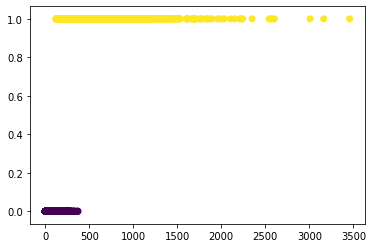

In [0]:
plt.scatter(X_train[:,4], y_pred, c = y_pred)
y_prob = LR.predict_proba(X_train)


In [0]:
X_3 = np.array([df['seconds']])
#X_3 = np.array([df['NV']])
X_3 = X_3.T
y_2 = np.array(df['habitual'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_3,y_2, test_size = 0.5)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_pred = LR.predict(X_train)

#Error de entrenamiento
from sklearn.metrics import accuracy_score
ET_RL = accuracy_score(y_train, y_pred)

#Error de prediccion
y_prb = LR.predict(X_test)
EP_RL = accuracy_score(y_test, y_prb)

#Probando un clasificador por arbol de decision
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
dtYpr = dt.predict(X_train)

#Error de entrenamiento
from sklearn.metrics import accuracy_score
ET_DT = accuracy_score(y_train, dtYpr)

#Error de prediccion
dty_prb = dt.predict(X_test)
EP_DT = accuracy_score(y_test, dty_prb)

#Probando un clasificador por k vecinos mas cercanos
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
nYpr = neigh.predict(X_train)

#Error de entrenamiento
from sklearn.metrics import accuracy_score
ET_KN = accuracy_score(y_train, nYpr)

#Error de prediccion
ny_prb = neigh.predict(X_test)
EP_KN = accuracy_score(y_test, ny_prb)

from sklearn.naive_bayes import GaussianNB
Gau = GaussianNB()
Gau.fit(X_train, y_train)
gYpr = Gau.predict(X_train)

#Error de entrenamiento
from sklearn.metrics import accuracy_score
ET_GB = accuracy_score(y_train, gYpr)

#Error de prediccion
gy_prb = Gau.predict(X_test)
EP_GB = accuracy_score(y_test, gy_prb)

Errores = {'Metodo de clasificacion': ['Regresion logistica', 'Arbol de decision', 'k vecinos mas cercanos', 
                            'GaussianNB'], 
              'Precision de entrenamiento': [ET_RL, ET_DT, ET_KN, ET_GB], 
               'Precision de testeo': [EP_RL, EP_DT, EP_KN, EP_GB]} 
Errores = pd.DataFrame(Errores)
Errores

Metodo de clasificacion  Precision de entrenamiento  Precision de testeo
0     Regresion logistica                    0.862265             0.856826
1       Arbol de decision                    0.999827             0.847151
2  k vecinos mas cercanos                    0.924128             0.851243
3              GaussianNB                    0.818018             0.812927

In [0]:
X_train2 = np.reshape(X_train,28838)

In [0]:
lg = pd.DataFrame({'x': X_train2, 'y': y_pred})
lg = lg.sort_values(by='x')

from scipy.special import expit

sigmoid_function = expit(lg['x'] * LR.coef_[0][0] + LR.intercept_[0]).ravel()

plt.plot(lg['x'], sigmoid_function)

plt.scatter(lg['x'], lg['y'], c=lg['y'], cmap='rainbow')

In [0]:
X_3 = np.array([df['NV']])
#X_3 = np.array([df['NV']])
X_3 = X_3.T
y_2 = np.array(df['habitual'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_3,y_2, test_size = 0.5)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_pred = LR.predict(X_train)

#Error de entrenamiento
from sklearn.metrics import accuracy_score
ET_RL = accuracy_score(y_train, y_pred)

#Error de prediccion
y_prb = LR.predict(X_test)
EP_RL = accuracy_score(y_test, y_prb)

#Probando un clasificador por arbol de decision
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
dtYpr = dt.predict(X_train)

#Error de entrenamiento
from sklearn.metrics import accuracy_score
ET_DT = accuracy_score(y_train, dtYpr)

#Error de prediccion
dty_prb = dt.predict(X_test)
EP_DT = accuracy_score(y_test, dty_prb)

#Probando un clasificador por k vecinos mas cercanos
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
nYpr = neigh.predict(X_train)

#Error de entrenamiento
from sklearn.metrics import accuracy_score
ET_KN = accuracy_score(y_train, nYpr)

#Error de prediccion
ny_prb = neigh.predict(X_test)
EP_KN = accuracy_score(y_test, ny_prb)

from sklearn.naive_bayes import GaussianNB
Gau = GaussianNB()
Gau.fit(X_train, y_train)
gYpr = Gau.predict(X_train)

#Error de entrenamiento
from sklearn.metrics import accuracy_score
ET_GB = accuracy_score(y_train, gYpr)

#Error de prediccion
gy_prb = Gau.predict(X_test)
EP_GB = accuracy_score(y_test, gy_prb)

Errores = {'Metodo de clasificacion': ['Regresion logistica', 'Arbol de decision', 'k vecinos mas cercanos', 
                            'GaussianNB'], 
              'Precision de entrenamiento': [ET_RL, ET_DT, ET_KN, ET_GB], 
               'Precision de testeo': [EP_RL, EP_DT, EP_KN, EP_GB]} 
Errores = pd.DataFrame(Errores)
Errores

Metodo de clasificacion  Precision de entrenamiento  Precision de testeo
0     Regresion logistica                    0.934843             0.933215
1       Arbol de decision                    0.938415             0.935261
2  k vecinos mas cercanos                    0.923850             0.919068
3              GaussianNB                    0.929884             0.927563

In [0]:
X_train2 = np.reshape(X_train,28838)

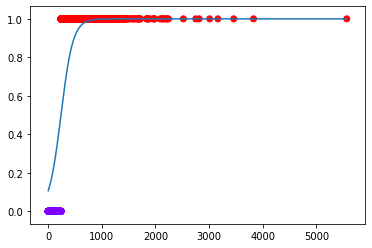

In [0]:
lg = pd.DataFrame({'x': X_train2, 'y': y_pred})
lg = lg.sort_values(by='x')

from scipy.special import expit

sigmoid_function = expit(lg['x'] * LR.coef_[0][0] + LR.intercept_[0]).ravel()

plt.plot(lg['x'], sigmoid_function)

plt.scatter(lg['x'], lg['y'], c=lg['y'], cmap='rainbow')